# Career Foundry Exercise 4.9 Part 2
#### Gabriel Pollicar, November 30, 2023

### Contents List:

#### Importing Libraries and Datasets
#### Task2. Reviewing for PHI/Security Implications
#### 

## Importing Libraries

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy

## Importing Datasets

In [73]:
path3 = r'C:\Users\polli\Career Foundry Python'
ords_prods_cust_LargeInitial = pd.read_pickle(os.path.join(path3, 'Exercise 4.9','02 Data', 'ords_prods_custers.pkl'))

In [74]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [75]:
# Importing Datasets

#age, income, certain goods in the “department_id” column, and number of dependents orders_day_of_week” and “order_hour_of_day”
#  order_time orders_day_of_week loyalty

# Merged Orders and Products and Customers Dataset
columns1 = ['order_id', 'user_id', 'order_number', 'days_since_prior_order', 'add_to_cart_order', 'price_range_loc', 'cust_frequency', '_merge']

ords_prods_cust_LargeInitial.drop(columns1, axis=1, inplace=True)
ords_prods_custs = ords_prods_cust_LargeInitial
ords_prods_custs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 16 columns):
 #   Column                Dtype  
---  ------                -----  
 0   product_id            int64  
 1   product_name          object 
 2   department_id         int64  
 3   prices                float64
 4   orders_day_of_week    int64  
 5   order_time(hour)      int64  
 6   max_order             int64  
 7   loyalty_flag          object 
 8   Average_Spent         float64
 9   Spending_Flag         object 
 10  order_frequency_flag  object 
 11  State                 object 
 12  Age                   int64  
 13  n_dependants          int64  
 14  fam_status            object 
 15  income                int64  
dtypes: float64(2), int64(8), object(6)
memory usage: 3.9+ GB


# Task #2 Reviewing for PHI/Security Implications

In [76]:
# Reviewing for PHI/Security Implications
# This dataset does not contain any names, the firstname and surname columns which can tie customers 
## to personal information has been removed during cleaning. 


# These Columns are considered PII: First Name and Surname
# These other columns are not needed in the investigation and were also cut for performance

ords_prods_custs.head()

,product_id,product_name,department_id,prices,orders_day_of_week,order_time(hour),max_order,loyalty_flag,Average_Spent,Spending_Flag,order_frequency_flag,State,Age,n_dependants,fam_status,income
0,1,Chocolate Sandwich Cookies,19,5.8,6,11,32,Regular customer,6.935811,Low_spender,Frequent customer,Minnesota,81,1,married,49620
1,1,Chocolate Sandwich Cookies,19,5.8,6,17,32,Regular customer,6.935811,Low_spender,Frequent customer,Minnesota,81,1,married,49620
2,907,Premium Sliced Bacon,12,20.0,5,13,32,Regular customer,6.935811,Low_spender,Frequent customer,Minnesota,81,1,married,49620
3,907,Premium Sliced Bacon,12,20.0,5,14,32,Regular customer,6.935811,Low_spender,Frequent customer,Minnesota,81,1,married,49620
4,1000,Apricots,10,12.9,6,12,32,Regular customer,6.935811,Low_spender,Frequent customer,Minnesota,81,1,married,49620


# Task #3 Regional Segmented Data

In [77]:
# This code fills a "Region" column with Northeast for Northeastern States depending on State column

ords_prods_custs.loc[ords_prods_custs['State'].isin(['Maine','New Hampshire','Vermont','Massachusetts', 'Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']), 'Region'] = 'Northeast'

In [78]:
# This code fills a "Region" column with Midwest for Midwestern States depending on State column

ords_prods_custs.loc[ords_prods_custs['State'].isin(['Wisconsin','Michigan','Illinois','Indiana', 'Ohio', 'North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']), 'Region'] = 'Midwest'

In [79]:
# This code fills a "Region" column with South for Southern States depending on State column

ords_prods_custs.loc[ords_prods_custs['State'].isin(['Delaware', 'Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina', 'Georgia','Florida','Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']), 'Region'] = 'South'

In [80]:
# This code fills a "Region" column with West for Western States depending on State column

ords_prods_custs.loc[ords_prods_custs['State'].isin(['Idaho', 'Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']), 'Region'] = 'West'

In [81]:
# This code returns a list of all states that is not represented with a region
# Used to check missing entries, missed states, null values

ords_prods_custs['State'][ords_prods_custs['Region'].isnull() == True].value_counts(dropna=False)

# Output is empty therefore all states and customers have been accounted for

Series([], Name: count, dtype: int64)

In [82]:
# Creating Crosstab with Spending Flag

pd.crosstab(ords_prods_custs['Region'],ords_prods_custs['Spending_Flag'],dropna=False)

Spending_Flag,High_spender,Low_spender
Region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


### Observation:

It seems that the south has the highest amount of spenders with the West, Midwest, and the Northeast following suit. The percentage of High spenders and low spenders stay relatively similar in both regions at 2% of total spenders compared to low spenders which has 98%. 


# Task #4 Exclusion Flag for Low Activity Customers

In [83]:
ords_prods_custs['max_order'].head()

0    32
1    32
2    32
3    32
4    32
Name: max_order, dtype: int64

In [84]:
# This code creates an array active_bool that enters either true or false depending on amount of orders in max_order

active_bool = []

for orders in ords_prods_custs["max_order"]:
  if orders < 5:
    active_bool.append(False)
  else:
    active_bool.append(True)

In [85]:
# Creates a new column cust_active that returns 
ords_prods_custs['Customer_activity'] = active_bool

In [86]:
ords_prods_custs_NotActive = ords_prods_custs[ords_prods_custs['Customer_activity'] == False]

In [93]:
ords_prods_cust_Active = ords_prods_custs[ords_prods_custs['Customer_activity'] == True]

In [94]:
# This code exports the subset of non-active customers

ords_prods_cust_Active.to_pickle(os.path.join(path3,'Exercise 4.10','05 Sent to Client','Non Active Customers.pkl'))

In [95]:
# This code exports the subset of active customers

ords_prods_cust_Active.to_pickle(os.path.join(path3,'Exercise 4.10','05 Sent to Client','Active Customers.pkl'))

In [96]:
# Code to check if all values have been assigned to each entry, checks for null values

ords_prods_custs_NotActive['Customer_activity'].value_counts(dropna=False)
ords_prods_cust_Active['Customer_activity'].value_counts(dropna=False)

Customer_activity
True    30964564
Name: count, dtype: int64

# Task #5 Customer Profiles

This section only analyzes Age group and Family Status variables of customer profiles. Many more variables and profiles are analyzed in Part II. 

In [ ]:
columns2 = ['max_order', 'Customer_activity']
ords_prods_cust_Active.drop(columns2, axis=1, inplace=True)
ords_prods_cust_Active = ords_prods_cust_Active
ords_prods_cust_Active.info()

## Age Group and Family Status Profiles

In [11]:
# Create Family Status based on Age

# These lines are conditional statements for determining age based on old or young 
## and also determines which family status each customer has for each age group
cond_yoMarried = (ords_prods_cust_Active['Age'] <=40) & (ords_prods_cust_Active['fam_status'] == 'married')
cond_yoSingle = (ords_prods_cust_Active['Age'] <=40) & (ords_prods_cust_Active['fam_status'] == 'single')
cond_yoDivorced = (ords_prods_cust_Active['Age'] <=40) & (ords_prods_cust_Active['fam_status'] == 'divorced/widowed')
cond_yoDependent = (ords_prods_cust_Active['Age'] <=40) & (ords_prods_cust_Active['fam_status'] == 'living with parents and siblings')

cond_oldMarried = (ords_prods_cust_Active['Age'] > 40) & (ords_prods_cust_Active['fam_status'] == 'married')
cond_oldSingle = (ords_prods_cust_Active['Age'] > 40) & (ords_prods_cust_Active['fam_status'] == 'single')
cond_oldDivorced = (ords_prods_cust_Active['Age'] > 40) & (ords_prods_cust_Active['fam_status'] == 'divorced/widowed')
cond_oldDependent = (ords_prods_cust_Active['Age'] > 40) & (ords_prods_cust_Active['fam_status'] == 'living with parents and siblings')


# This Code creates a new column 'Profile' which categorizes each customer on their age group young or old and family status
ords_prods_cust_Active.loc[cond_yoMarried, 'Profile'] = 'Young and Married'
ords_prods_cust_Active.loc[cond_yoSingle, 'Profile'] = 'Young and Single'
ords_prods_cust_Active.loc[cond_yoDivorced, 'Profile'] = 'Young and Divorced'
ords_prods_cust_Active.loc[cond_yoDependent, 'Profile'] = 'Young and Dependent'

ords_prods_cust_Active.loc[cond_oldMarried, 'Profile'] = 'Old and Married'
ords_prods_cust_Active.loc[cond_oldSingle, 'Profile'] = 'Old and Single'
ords_prods_cust_Active.loc[cond_oldDivorced, 'Profile'] = 'Old and Divorced'
ords_prods_cust_Active.loc[cond_oldDependent, 'Profile'] = 'Old and Dependent'

In [12]:
# This code checks for nulls and looks at value_count for all profile types
ords_prods_cust_Active['Profile'].value_counts(dropna=False)

# Output shows no null values and total of all counts equals total entries in ords_prods_cust_Active dataset

# This output seems logically valid as most people who are older are mostly married, 
# and people who are young are mostly either married or single, few (18+) are still dependent

Profile
Old and Married        14856709
Young and Married       6887002
Young and Single        2780259
Old and Divorced        2645271
Old and Single          2314151
Young and Dependent     1481172
Name: count, dtype: int64

# Task #6 Create Visualization

### Age Group and Family Status Profiles Visualization

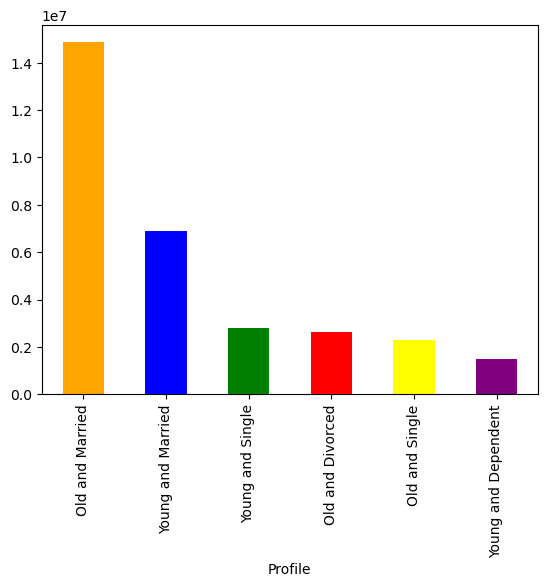

In [13]:
# creating histogram object to show distribution of consumer ages to determine flag criteria

bar_profiles = ords_prods_cust_Active['Profile'].value_counts().plot.bar(color = ['orange', 'blue', 'green', 'red', 'yellow', 'purple'])

# This bar chart shows the amount of customers in each demographic profile. The majority seems to be older individuals who are married.

# Exporting Dataset for Part II #

In [14]:
ords_prods_cust_Active.to_pickle(os.path.join(path3,'Exercise 4.10','02 Data','Active Customers Dataset.pkl'))